# 1.Import Livraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2.Import Dataset

In [2]:
anime = pd.read_csv("anime.csv")
anime_rating = pd.read_csv("rating.csv")

movie = pd.read_csv("movies.csv")
movie_rating = pd.read_csv("ratings.csv")

# 3.Data Exploration

#### 3.1 Anime dataset

In [3]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
print(f"Informations About Anime Dataset :\n")
print(anime.info())

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [5]:
print(f"Summary of The Anime Dataset :")
anime.describe()

Summary of The Anime Dataset :


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
anime.describe(include=object)

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


In [7]:
print("Null Values of Anime Dataset :")
anime.isna().sum().to_frame()

Null Values of Anime Dataset :


,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


##### Delete all rows with missing values

In [8]:
print("After Dropping, Null Values of Anime Dataset :")
anime.dropna(axis = 0, inplace = True)
anime.isna().sum().to_frame()

After Dropping, Null Values of Anime Dataset :


,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


#### 3.2 Anime Rating dataset

In [9]:
print(f"Shape of The Rating Dataset : {anime_rating.shape}")
print(f"\nGlimpse of The Dataset :")
anime_rating.head()

Shape of The Rating Dataset : (7813737, 3)

Glimpse of The Dataset :


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [10]:
print("Null Values of Rating Dataset :")
anime_rating.isna().sum().to_frame()

Null Values of Rating Dataset :


,0
user_id,0
anime_id,0
rating,0


In [11]:
print(f"Summary of The Rating Dataset :")
anime_rating.describe()

Summary of The Rating Dataset :


,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


#### 3.3 Anime Full dataset

##### Merge the anime and rating dataset

In [12]:
anime_fulldata = pd.merge(anime,anime_rating,on="anime_id",suffixes= [None, "_user"])
anime_fulldata = anime_fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {anime_fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

anime_fulldata.head()

Shape of The Merged Dataset : (7813611, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [13]:
anime_fulldata.isna().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [14]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]


##### List animation types in the order in which they appear most frequently

In [15]:
# Animation Category
top_anime = anime_fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)
print("Anime Categories :")
top_anime_temp1['type'].value_counts().to_frame()

Anime Categories :


,type
TV,3402
OVA,3090
Movie,2111
Special,1581
ONA,526
Music,451


##### TV, OVA, Movie are top3 animation types

##### Show the animation type distribution as a percentage in pie plot

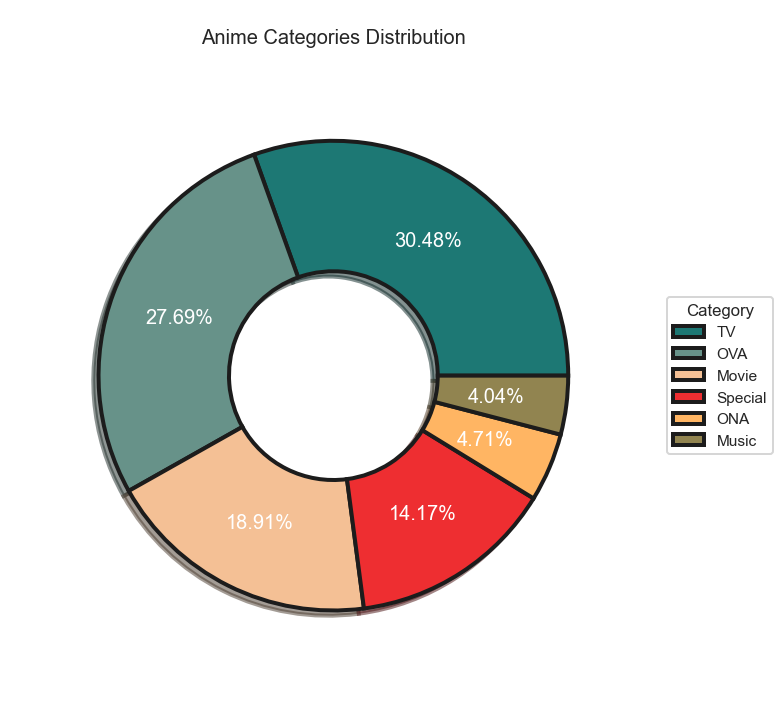

In [16]:
plt.subplots(figsize=(12, 12))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

##### Show the animation's average ratings distribution as a bar graph
#####  
###### - Most of the Anime ratings are spread between 5.5 - 8.0
###### - Most of the users ratings are spread between 6.0 - 10.0
###### - The mode of the users ratings distribution is around 7.0 - 8.0
###### - Both the distribution are left skewed
###### - Users rating(-1) is an outlier in ratings of users which can be discarded

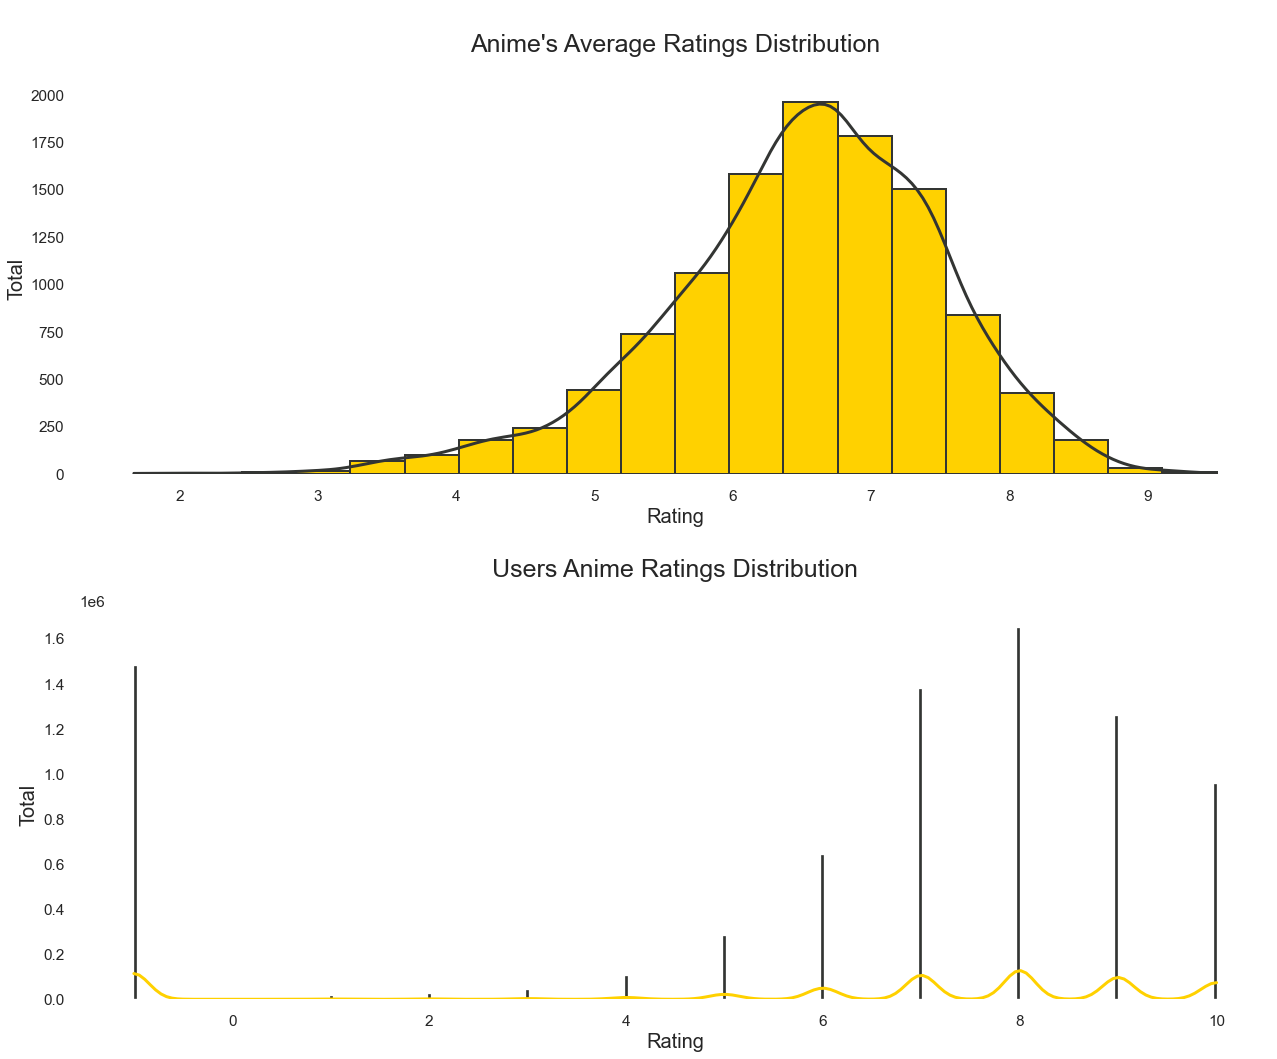

In [17]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(anime_fulldata["user_rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

##### List animation types in the order in which they appear most frequently

In [18]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Total unique genres are {len(top_anime_temp3["genre"].unique())}')
print(f'Occurances of unique genres :')
top_anime_temp3["genre"].value_counts().to_frame()

Total unique genres are 43
Occurances of unique genres :


,genre
Comedy,4271
Action,2686
Adventure,2197
Fantasy,2107
Sci-Fi,1981
Drama,1857
Shounen,1636
Romance,1420
Kids,1306
School,1135


##### Comedy, Action, Adventure are top3 animation genre

#### 3.4 Movie dataset

In [19]:
movie.rename(columns = {"movieId" : "movie_id", "title" : "name", "genres" : "genre"}, inplace = True)
movie.head()

,movie_id,name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
#moive2 = movie.copy()
#movie2 = pd.merge(movie,movie_rating, on = "movie_id")
#movie = movie2.drop(labels = ["user_id","timestamp"],axis=1)
#movie.head()

In [21]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  10329 non-null  int64 
 1   name      10329 non-null  object
 2   genre     10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [22]:
movie.describe()

,movie_id
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


#### 3.4 Movie Rating dataset

In [23]:
movie_rating.rename(columns = {"userId" : "user_id", "movieId" : "movie_id"}, inplace = True)
movie_rating.head()

,user_id,movie_id,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [24]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    105339 non-null  int64  
 1   movie_id   105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [25]:
movie_rating.describe()

,user_id,movie_id,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


#### 3.5 Movie Full dataset

In [26]:
movie_fulldata = pd.merge(movie,movie_rating,on="movie_id",suffixes= [None, "_user"])
movie_fulldata = movie_fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {movie_fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

movie_fulldata.head()

Shape of The Merged Dataset : (105339, 6)

Glimpse of The Merged Dataset :


,movie_id,name,genre,user_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


# 4.Data Preprocessing

In [27]:
data = anime_fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame()

Null values after final pre-processing :


,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0
user_id,0
user_rating,0


##### Consider minimum 50 ratings by the user as a threshold value
###  
###### There are a lot of users who have rated only once, even if they have rated 5 animes,
######  so it can't be considered as a valuable record for recommendation.

In [28]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

##### Create a pivot table consists of rows as title and columns as user id

###### It will help us to create sparse matrix which can be very helpful in finding the cosine similarity

In [29]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Remove japanese/special character symbols in anime name

In [30]:
import re
def text_cleaning(text):
    text = re.sub(r'"', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r"'", '', text)
    text = re.sub(r"A's", '', text)
    text = re.sub(r"I'", 'I\'', text)
    text = re.sub(r'&', 'and', text)
    
    return text

data["name"] = data["name"].apply(text_cleaning)

In [31]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("After Cleaning the animes names, let's see how it looks like.")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like.


user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: Randamp;B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Learning Model

#### 5.1 Collaborative Recommender
#### Using KNN(cosine similarity)
##### - KNN is a machine learning algorithm to find clusters of similar users based on common anime ratings, and make predictions using the average rating of top-k nearest neighbors
##### - Cosine similarity refers to the similarity of two vectors obtained using the cosine angle between two vectors. If the two vectors have exactly the same direction, they have a value of 1, and if they have an angle of 90°, they have a value of 0, 180° and vice versa, they have a value of -1
##### - The cosine distance is calculated using the metric method of the KNN  algorithm. When an animation title is entered using cosine distance, an animation that users will like is provided.

https://www.kaggle.com/code/raksh710/content-based-filtering-sorted-by-weighted-average

In [32]:
def search_KNN(domain_data,rating_data,domain_id,title):
  # make pivot table
  fulldata = pd.merge(domain_data,rating_data,on=domain_id,suffixes= [None, "_user"])
  fulldata = fulldata.rename(columns={"rating_user": "user_rating"})
  fulldata = fulldata.rename(columns={"rating": "user_rating"})

  data = fulldata.copy()
  data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
  data = data.dropna(axis = 0)

  selected_users = data["user_id"].value_counts()
  data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

  data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)

  # Comput Cosin simmiliarity

  from scipy.sparse import csr_matrix
  from sklearn.neighbors import NearestNeighbors

  data_matrix = csr_matrix(data_pivot.values)

  model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
  model_knn.fit(data_matrix)

  distances, indices = model_knn.kneighbors(data_pivot.loc[title].values.reshape(1, -1), n_neighbors = 6)

  # recommendation
  no = []
  name = []
  distance = []


  for i in range(0, len(distances.flatten())):
      if i == 0:
          print('Recommendations for {} viewers :'.format(title))
      else:      
          no.append(i)
          name.append(data_pivot.index[indices.flatten()[i]])
          distance.append(distances.flatten()[i])
          
          

  dic = {"No" : no, "Name" : name}
  recommendation = pd.DataFrame(data = dic)
  recommendation.set_index("No", inplace = True)
  
  return recommendation

#### 5.2 Collaborative Recommender
#### Using Apriori
##### - The Apriori algorithm is an association rule, which refers to another event rule that occurs (often) together when a specific event occurs.
##### - When a single animation title is input using the apriori algorithm, and animations title that the user may like is suggested.


In [33]:
from mlxtend.frequent_patterns import apriori, association_rules

def make_data(domain_data,rating_data,criterion,domain_id):
  #make data frame
  df = pd.merge(rating_data, domain_data, on = domain_id)
  df.rename(columns = {"rating_y" : "rating"},inplace=True)
  df1 = df[df["rating"]>criterion].drop_duplicates()
  return df1,df

def make_rules(df1,df):  
  crosstab = pd.crosstab(df1["user_id"], df["name"]).astype('bool')
  freq_domain = apriori(crosstab,min_support=0.05,use_colnames=True)
  rules = association_rules(freq_domain,metric='confidence',min_threshold=0.1)
  rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0])
  rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0])
  return rules

def serach_aprior(rules,string):  
  search_df = rules[rules['antecedents'].str.lower()== string.lower()]
  search_df.sort_values(by='lift', ascending=False)
  return search_df[:10]['consequents']

#### 5.3 Content Based Recommender
#### Using TF-IDF weighting and Sigmoid_kernel
###### - TF-IDF, or term frequency-inverse document frequency, is a figure that expresses the statistical importance of any given word to the document collection as a whole. TF-IDF is calculated by multiplying term frequency and inverse document frequency.
###### - Sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. 
###### - It recommends movies using SVD using animation information that the user has seen in the past.

In [34]:
def search_Tfidf(title,domain_data,rating_data,full_data,split):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import sigmoid_kernel

    # Convert vector
    tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

    rec_data = full_data.copy()
    rec_data.drop_duplicates(subset = "name", keep = "first", inplace = True)
    rec_data.reset_index(drop = True, inplace = True)
    genres = rec_data["genre"].str.split(split).astype(str)
    tfv_matrix = tfv.fit_transform(genres)
    

    sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

    rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()
    
    idx = rec_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11), 
               "Name" : domain_data["name"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe

# recommend

In [35]:
def recommend(title, main_data, rating_data, fulldata, data_id, criterion, split):
    print('-- Collaborative Recommender / KNN --')
    print(search_KNN(main_data, rating_data, data_id, title))
    print()
    
    print('-- Collaborative Recommender / Apriori --')
    df1,df = make_data(main_data, rating_data, criterion, data_id)
    rules = make_rules(df1,df)
    print(serach_aprior(rules,title))
    print()
    
    print('-- Content Based Recommender / TF-IDF --')
    print(search_Tfidf(title, main_data, rating_data, fulldata, split))
    print()

In [92]:
recommend('One Punch Man', anime, anime_rating, anime_fulldata, 'anime_id', 8.5, ', | , | ,')

-- Collaborative Recommender / KNN --
Recommendations for One Punch Man viewers :
                          Name
No                            
1      Boku dake ga Inai Machi
2           Shingeki no Kyojin
3   Kiseijuu: Sei no Kakuritsu
4              No Game No Life
5                  Tokyo Ghoul

-- Collaborative Recommender / Apriori --
48     Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...
102                                             Baccano!
169                              Boku dake ga Inai Machi
218                                 Clannad: After Story
298                      Code Geass: Hangyaku no Lelouch
372                   Code Geass: Hangyaku no Lelouch R2
427                                         Cowboy Bebop
486                                           Death Note
559                                            Fate/Zero
601                                 Fate/Zero 2nd Season
Name: consequents, dtype: object

-- Content Based Recommender / TF-IDF --
Recommendatio

# 7.Applied to the model

In [36]:
recommend('Matrix, The (1999)', movie, movie_rating, movie_fulldata, 'movie_id', 4, '|')

-- Collaborative Recommender / KNN --
Recommendations for Matrix, The (1999) viewers :
                                                 Name
No                                                   
1                                   Fight Club (1999)
2   Lord of the Rings: The Fellowship of the Ring,...
3                              American Beauty (1999)
4   Star Wars: Episode V - The Empire Strikes Back...
5   Raiders of the Lost Ark (Indiana Jones and the...

-- Collaborative Recommender / Apriori --
4                   Alien (1979)
12                 Aliens (1986)
26        American Beauty (1999)
46     Back to the Future (1985)
56           Blade Runner (1982)
67             Braveheart (1995)
110            Fight Club (1999)
131          Forrest Gump (1994)
156             Gladiator (2000)
165        Godfather, The (1972)
Name: consequents, dtype: object

-- Content Based Recommender / TF-IDF --
Recommendations for Matrix, The (1999) viewers :

                      Name
No        